---
# **PyCaret for Clustering**
---


In [1]:
import matplotlib.pyplot as plt

In [2]:
!pip install pycaret &> /dev/null
print ("Pycaret installed sucessfully!!")

Pycaret installed sucessfully!!


In [3]:
from pycaret.utils import version
version()

'3.2.0'

---
# **1. Clustering - Part 1 (Kmean Clustering)**
---
### Get the list of datasets available in pycaret

In [4]:
from pycaret.datasets import get_data
dataSets = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


### I will be using the Jewellery dataset

In [5]:
jewel = get_data('jewellery')

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


In [6]:
from pycaret.clustering import *
kMeanClusteringParameters = setup(jewel)

,Description,Value
0,Session id,1792
1,Original data shape,"(505, 4)"
2,Transformed data shape,"(505, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


### Exploring the dataset and creating a sample clustering k-means model

In [7]:
KMeanClusteringModel = create_model('kmeans', num_clusters=4)
kMeanPrediction = assign_model(KMeanClusteringModel)
kMeanPrediction.head()

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7207,5011.8115,0.4114,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Age,Income,SpendingScore,Savings,Cluster
0,58,77769,0.791329,6559.830078,Cluster 2
1,59,81799,0.791082,5417.661621,Cluster 2
2,62,74751,0.702657,9258.993164,Cluster 2
3,59,74373,0.765680,7346.334473,Cluster 2
4,87,17760,0.348778,16869.507812,Cluster 1


### Ploting the Clusters

In [8]:
evaluate_model(KMeanClusteringModel)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

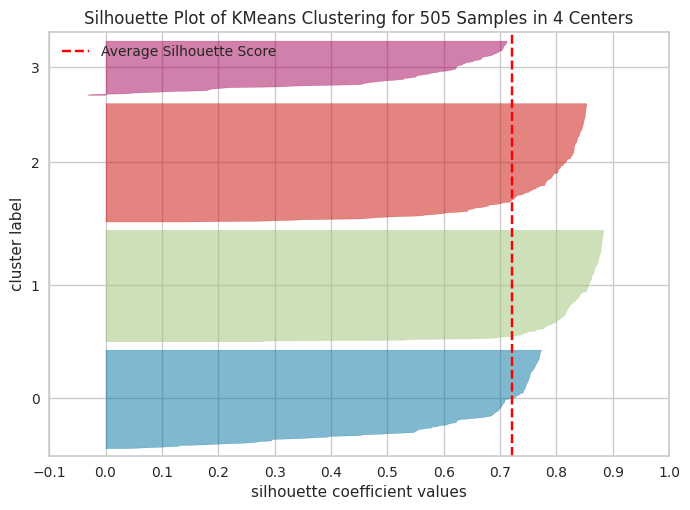

In [9]:
plot_model(KMeanClusteringModel, plot = 'silhouette')

In [10]:
plot_model(KMeanClusteringModel, plot='cluster')

In [11]:
plot_model(KMeanClusteringModel, plot = 'tsne')

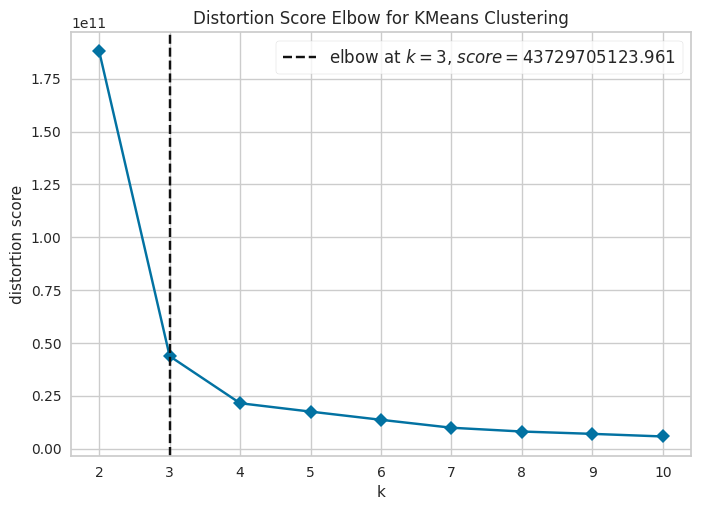

In [12]:
plot_model(KMeanClusteringModel, plot = 'elbow')

### Now, I will be using 5 different techniques for clustering the dataset:


*   Without data processing
*   With Normalisation
*   With Transformation
*   With PCA
*   With both T+N
*   With T+N+PCA



In [13]:
# import pandas as pd

# for i in [5,6,7]:
#   print("For Cluster = ",i)
#   x = create_model('kmeans', num_clusters = i)

#   metrics=get_metrics()
#   print(metrics['Score Function'])
#   print(metrics.columns)
#   #scores=[metrics['Silhouette'],metrics['Calinski_Harabasz'],metrics['Davies_Bouldin']]
#   scores = [metric(data, labels) for _, metric in metrics.items()]

#   data = {'No Data Processing': scores}

#   if i==5:
#     df5 = pd.DataFrame(data, index=['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin'])
#   elif i==6:
#     df6 = pd.DataFrame(data, index=['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin'])
#   else:
#     df7 = pd.DataFrame(data, index=['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin'])

# df5

#### All the scores are calculated for no. of clusters= {3,4,5,6}

In [14]:
import pandas as pd

# Create the DataFrame
df3 = pd.DataFrame({}, index=['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin'])
df4 = pd.DataFrame({}, index=['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin'])
df5 = pd.DataFrame({}, index=['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin'])
df6 = pd.DataFrame({}, index=['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin'])

Without Data Processing


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7207,5011.8115,0.4114,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

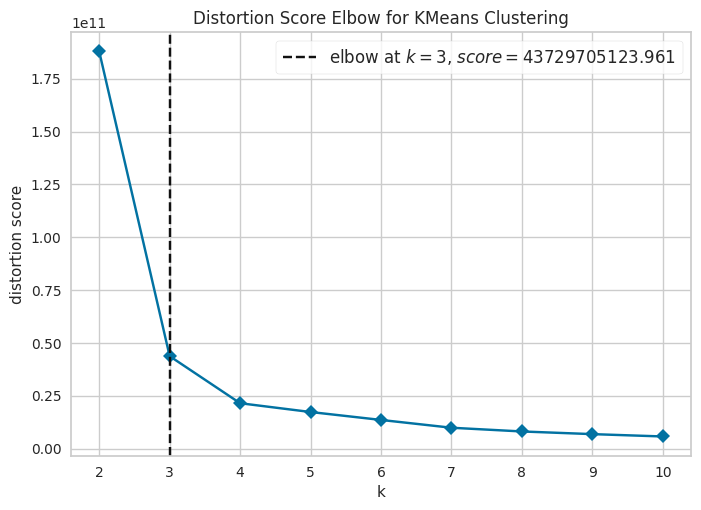

For Cluster =  3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7393,3567.5370,0.3435,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster =  4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7207,5011.8115,0.4114,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster =  5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6777,4685.1995,0.4596,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster =  6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5784,4805.1793,0.5696,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Normalisation


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7581,1611.2647,0.3743,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

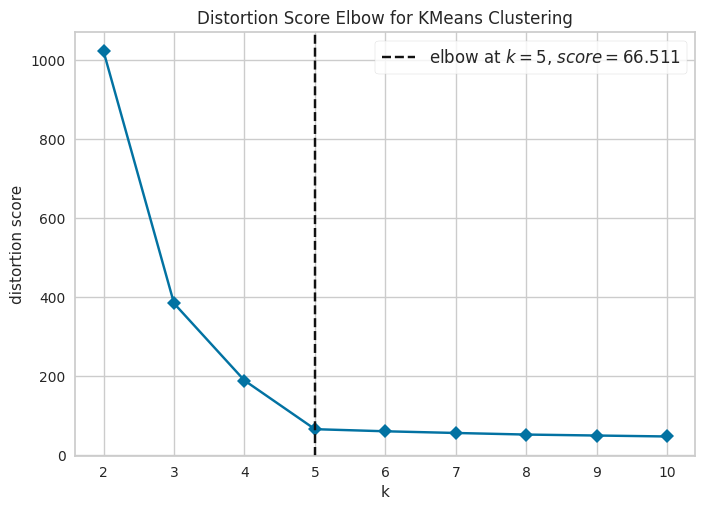

For Cluster =  3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6963,1066.5812,0.5258,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster =  4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7581,1611.2647,0.3743,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster =  5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8049,3671.3580,0.2762,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster =  6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6314,3195.0287,0.7125,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Transformation


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7809,3519.5778,0.3135,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

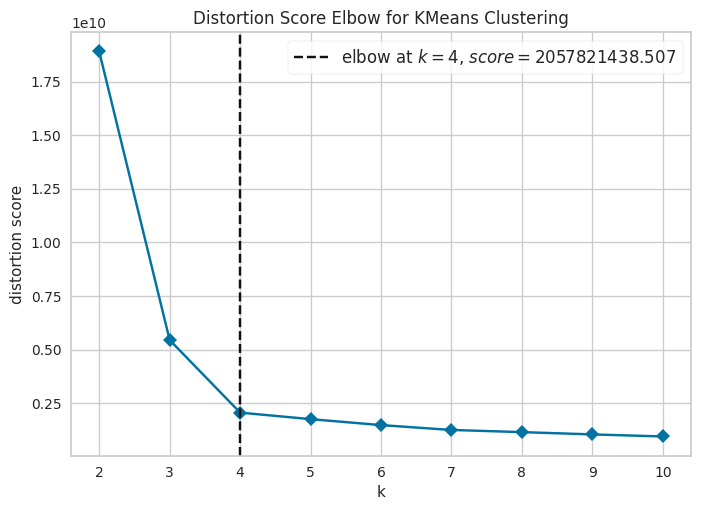

For Cluster =  3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7383,1843.8285,0.3816,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster =  4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7809,3519.5778,0.3135,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster =  5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6560,3115.2648,0.5889,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster =  6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5321,2973.0222,0.7774,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

PCA


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7207,5011.8115,0.4114,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

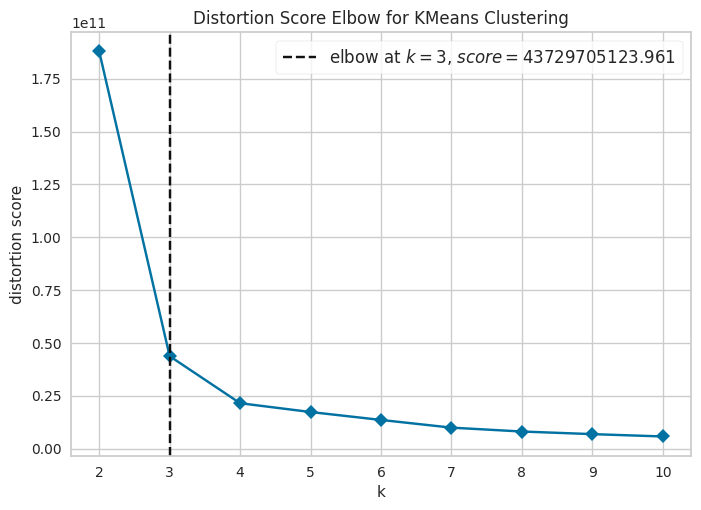

For Cluster =  3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7393,3567.5370,0.3435,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster =  4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7207,5011.8115,0.4114,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster =  5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6777,4685.1995,0.4596,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster =  6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5778,4806.0041,0.5735,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Transformation and Normalisation


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7544,1467.4682,0.3868,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

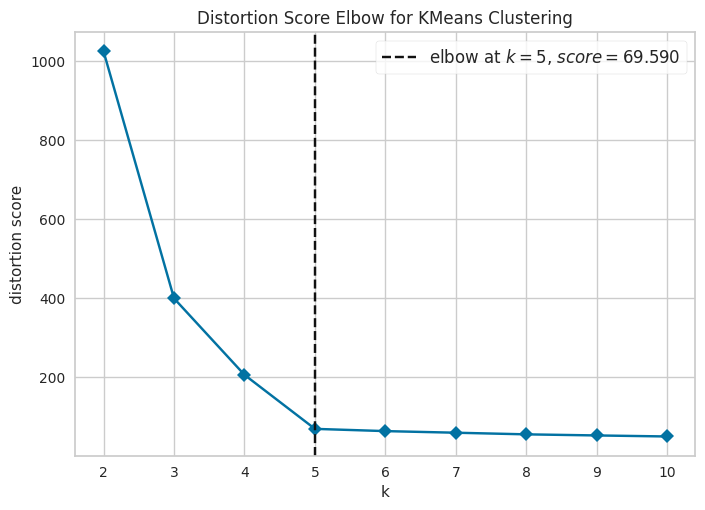

For Cluster =  3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6912,1016.4677,0.5410,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster =  4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7544,1467.4682,0.3868,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster =  5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8063,3503.4024,0.2748,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster =  6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6329,3054.7759,0.7229,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Transformation, Normalisation and PCA


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7544,1467.4682,0.3868,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

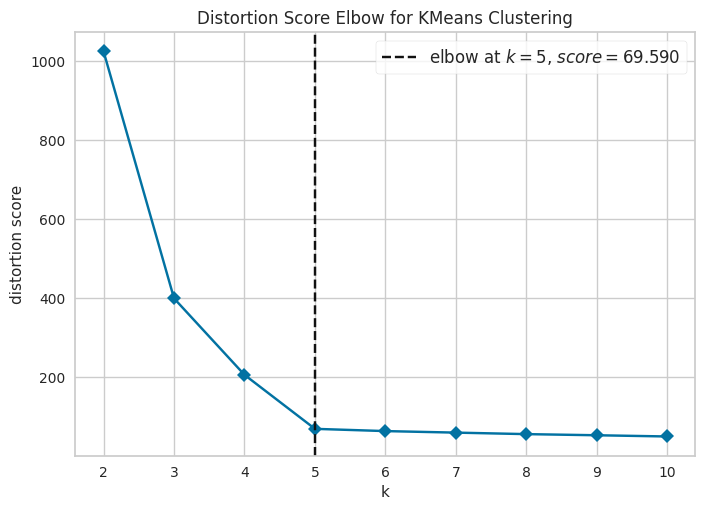

For Cluster =  3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6912,1016.4677,0.5410,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster =  4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7544,1467.4682,0.3868,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster =  5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8063,3503.4024,0.2748,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster =  6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6329,3054.7759,0.7229,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [15]:
#K-means clustering

name=['Without Data Processing','Normalisation','Transformation','PCA','Transformation and Normalisation','Transformation, Normalisation and PCA']
df_name=[df3,df4,df5,df6]

for i in range(0,6):
  #Without Data Processing
  if i==0:
    setup(data = jewel, verbose=False)

  #With Normalisation
  elif i==1:
    setup(data = jewel, normalize = True, normalize_method = 'zscore', verbose=False)

  #With Transformation
  elif i==2:
    setup(data = jewel, transformation = True, transformation_method = 'yeo-johnson', verbose=False)

  #With PCA
  elif i==3:
    setup(data = jewel, pca = True, pca_method = 'linear', verbose=False)

  #With Transformation and Normalisation
  elif i==4:
    setup(data = jewel, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)

  #With Transformation, Normalisation and PCA
  elif i==5:
    setup(data = jewel, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson',
      pca_method = 'linear', verbose=False)

  else:
    break

  print(name[i])
  x = create_model('kmeans')
  plot_model(x, plot = 'elbow')

  for j in range(3,7):
    print("For Cluster = ",j)
    x = create_model('kmeans', num_clusters = j)
    df=pull()
    c=[df['Silhouette'][0],df['Calinski-Harabasz'][0],df['Davies-Bouldin'][0]]
    df_name[j-3].insert(i,name[i],c,True)


### Using K-means Clustering all the scores are calculated for clusters={3,4,5,6}

In [16]:
for i in range(0,4):
  print('No. of clusters= ',i+3)
  print(display(df_name[i]))

No. of clusters=  3


,Without Data Processing,Normalisation,Transformation,PCA,Transformation and Normalisation,"Transformation, Normalisation and PCA"
Silhouette,0.7393,0.6963,0.7383,0.7393,0.6912,0.6912
Calinski-Harabasz,3567.5370,1066.5812,1843.8285,3567.5370,1016.4677,1016.4677
Davies-Bouldin,0.3435,0.5258,0.3816,0.3435,0.5410,0.5410


None
No. of clusters=  4


,Without Data Processing,Normalisation,Transformation,PCA,Transformation and Normalisation,"Transformation, Normalisation and PCA"
Silhouette,0.7207,0.7581,0.7809,0.7207,0.7544,0.7544
Calinski-Harabasz,5011.8115,1611.2647,3519.5778,5011.8115,1467.4682,1467.4682
Davies-Bouldin,0.4114,0.3743,0.3135,0.4114,0.3868,0.3868


None
No. of clusters=  5


,Without Data Processing,Normalisation,Transformation,PCA,Transformation and Normalisation,"Transformation, Normalisation and PCA"
Silhouette,0.6777,0.8049,0.6560,0.6777,0.8063,0.8063
Calinski-Harabasz,4685.1995,3671.3580,3115.2648,4685.1995,3503.4024,3503.4024
Davies-Bouldin,0.4596,0.2762,0.5889,0.4596,0.2748,0.2748


None
No. of clusters=  6


,Without Data Processing,Normalisation,Transformation,PCA,Transformation and Normalisation,"Transformation, Normalisation and PCA"
Silhouette,0.5784,0.6314,0.5321,0.5778,0.6329,0.6329
Calinski-Harabasz,4805.1793,3195.0287,2973.0222,4806.0041,3054.7759,3054.7759
Davies-Bouldin,0.5696,0.7125,0.7774,0.5735,0.7229,0.7229


None


### Here, I can see that when the no. of clusters=5 with Transformation and Normalisation then the Silhouette score is maximum
#### Hence, I plot the clusters in such setup

In [17]:
#no. of clusters=5

setup(data = jewel, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)

x = create_model('kmeans', num_clusters = 5)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8063,3503.4024,0.2748,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

#### Cluster 2-D plot

In [18]:
plot_model(KMeanClusteringModel, plot='cluster')

#### Cluster 3-D plot

In [19]:
plot_model(KMeanClusteringModel, plot = 'tsne')

---
# **1. Clustering - Part 2 (Hierarchical Clustering)**
---

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7060,4827.2243,0.4339,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

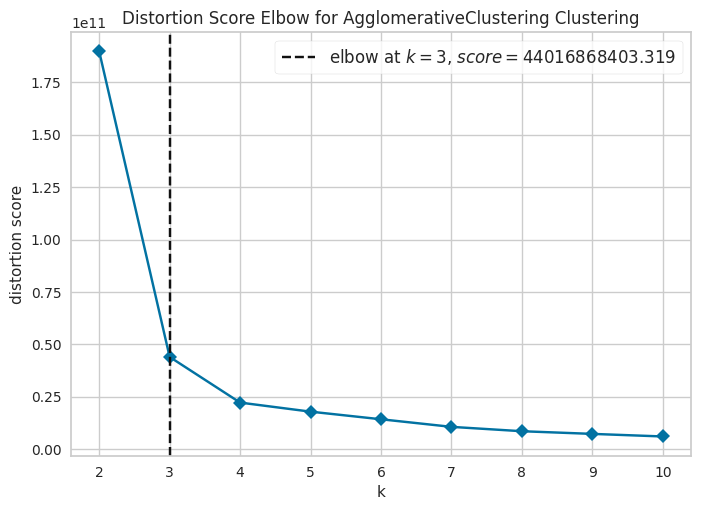

In [20]:
from pycaret.datasets import get_data
from pycaret.clustering import *

jewelleryDataSet = get_data('jewellery', verbose=False)
setup(data = jewelleryDataSet, verbose=False)

x = create_model('hclust')
plot_model(x, plot = 'elbow')

#### Now, applying the same steps as above to form a large dataframe consisting of different parameters for clustering

In [21]:
import pandas as pd

# Create the DataFrame
df3 = pd.DataFrame({}, index=['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin'])
df4 = pd.DataFrame({}, index=['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin'])
df5 = pd.DataFrame({}, index=['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin'])
df6 = pd.DataFrame({}, index=['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin'])

Without Data Processing


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7060,4827.2243,0.4339,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

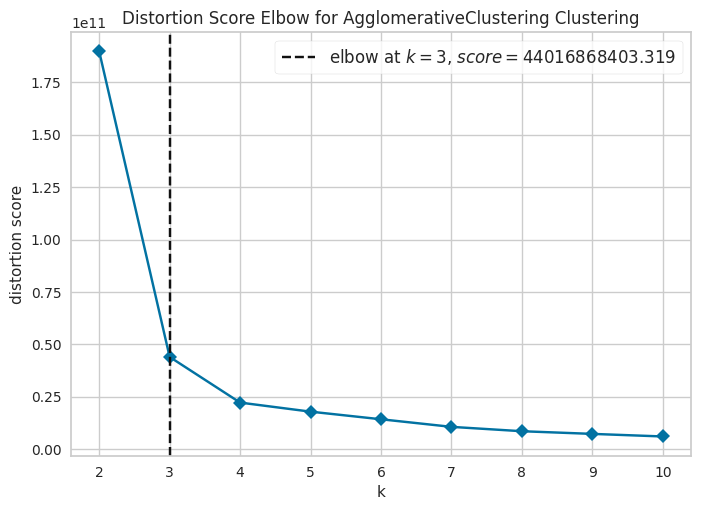

For Cluster =  3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7391,3542.6251,0.3407,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster =  4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7060,4827.2243,0.4339,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster =  5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6908,4516.4327,0.4650,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster =  6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5938,4547.3664,0.5642,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Normalisation


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7581,1611.2647,0.3743,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

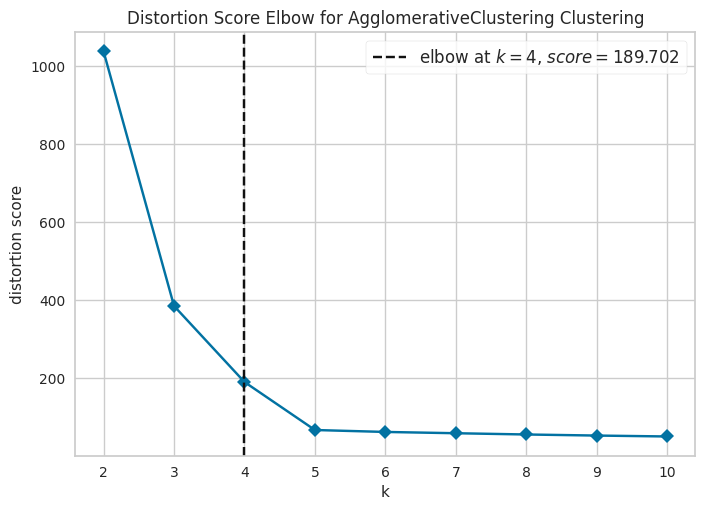

For Cluster =  3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6963,1066.5812,0.5258,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster =  4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7581,1611.2647,0.3743,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster =  5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8049,3671.3580,0.2762,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster =  6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6277,3175.3967,0.7303,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Transformation


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7809,3519.5778,0.3135,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

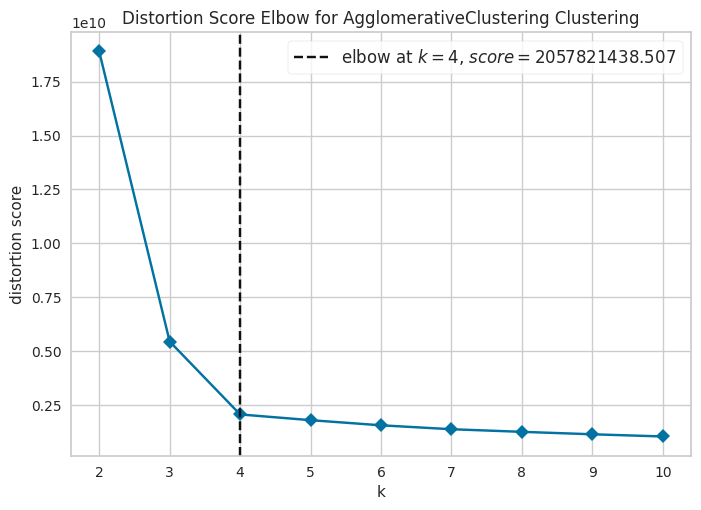

For Cluster =  3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7383,1843.8285,0.3816,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster =  4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7809,3519.5778,0.3135,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster =  5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6506,3043.7651,0.5975,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster =  6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5139,2818.2489,0.7798,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

PCA


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7060,4827.2243,0.4339,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

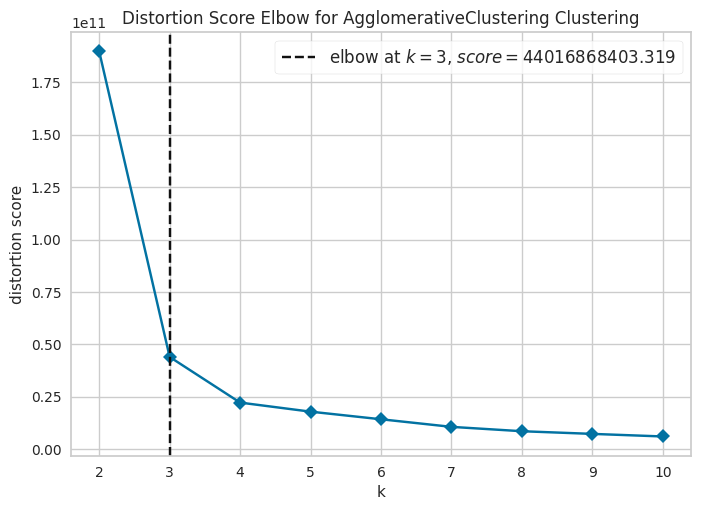

For Cluster =  3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7391,3542.6251,0.3407,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster =  4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7060,4827.2243,0.4339,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster =  5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6908,4516.4327,0.4650,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster =  6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5938,4547.3664,0.5642,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Transformation and Normalisation


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7544,1467.4682,0.3868,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

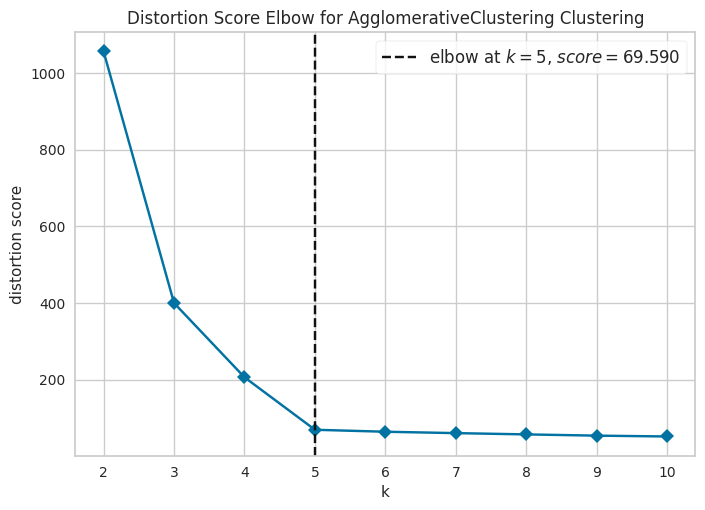

For Cluster =  3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6912,1016.4677,0.5410,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster =  4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7544,1467.4682,0.3868,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster =  5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8063,3503.4024,0.2748,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster =  6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6295,3028.7775,0.7251,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Transformation, Normalisation and PCA


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7544,1467.4682,0.3868,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

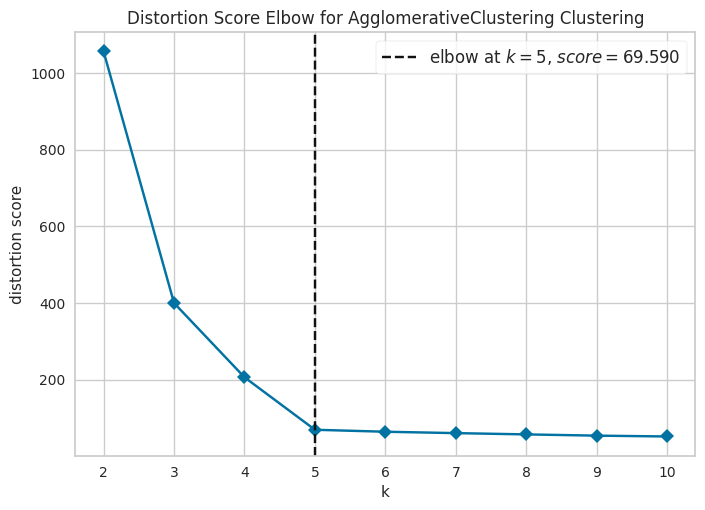

For Cluster =  3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6912,1016.4677,0.5410,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster =  4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7544,1467.4682,0.3868,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster =  5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8063,3503.4024,0.2748,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster =  6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6295,3028.7775,0.7251,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [22]:
#Hierarchical clustering
name=['Without Data Processing','Normalisation','Transformation','PCA','Transformation and Normalisation','Transformation, Normalisation and PCA']
df_name=[df3,df4,df5,df6]

for i in range(0,6):
  #Without Data Processing
  if i==0:
    setup(data = jewel, verbose=False)

  #With Normalisation
  elif i==1:
    setup(data = jewel, normalize = True, normalize_method = 'zscore', verbose=False)

  #With Transformation
  elif i==2:
    setup(data = jewel, transformation = True, transformation_method = 'yeo-johnson', verbose=False)

  #With PCA
  elif i==3:
    setup(data = jewel, pca = True, pca_method = 'linear', verbose=False)

  #With Transformation and Normalisation
  elif i==4:
    setup(data = jewel, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)

  #With Transformation, Normalisation and PCA
  elif i==5:
    setup(data = jewel, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson',
      pca_method = 'linear', verbose=False)

  else:
    break

  print(name[i])
  x = create_model('hclust')
  plot_model(x, plot = 'elbow')

  for j in range(3,7):
    print("For Cluster = ",j)
    x = create_model('hclust', num_clusters = j)
    df=pull()
    c=[df['Silhouette'][0],df['Calinski-Harabasz'][0],df['Davies-Bouldin'][0]]
    df_name[j-3].insert(i,name[i],c,True)


### Using Hierarchical Clustering all the scores are calculated for clusters={3,4,5,6}

In [23]:
for i in range(0,4):
  print('No. of clusters= ',i+3)
  print(display(df_name[i]))

No. of clusters=  3


,Without Data Processing,Normalisation,Transformation,PCA,Transformation and Normalisation,"Transformation, Normalisation and PCA"
Silhouette,0.7391,0.6963,0.7383,0.7391,0.6912,0.6912
Calinski-Harabasz,3542.6251,1066.5812,1843.8285,3542.6251,1016.4677,1016.4677
Davies-Bouldin,0.3407,0.5258,0.3816,0.3407,0.5410,0.5410


None
No. of clusters=  4


,Without Data Processing,Normalisation,Transformation,PCA,Transformation and Normalisation,"Transformation, Normalisation and PCA"
Silhouette,0.7060,0.7581,0.7809,0.7060,0.7544,0.7544
Calinski-Harabasz,4827.2243,1611.2647,3519.5778,4827.2243,1467.4682,1467.4682
Davies-Bouldin,0.4339,0.3743,0.3135,0.4339,0.3868,0.3868


None
No. of clusters=  5


,Without Data Processing,Normalisation,Transformation,PCA,Transformation and Normalisation,"Transformation, Normalisation and PCA"
Silhouette,0.6908,0.8049,0.6506,0.6908,0.8063,0.8063
Calinski-Harabasz,4516.4327,3671.3580,3043.7651,4516.4327,3503.4024,3503.4024
Davies-Bouldin,0.4650,0.2762,0.5975,0.4650,0.2748,0.2748


None
No. of clusters=  6


,Without Data Processing,Normalisation,Transformation,PCA,Transformation and Normalisation,"Transformation, Normalisation and PCA"
Silhouette,0.5938,0.6277,0.5139,0.5938,0.6295,0.6295
Calinski-Harabasz,4547.3664,3175.3967,2818.2489,4547.3664,3028.7775,3028.7775
Davies-Bouldin,0.5642,0.7303,0.7798,0.5642,0.7251,0.7251


None


### Here, I can see that when the no. of clusters=5 with Transformation and Normalisation then the Silhouette score is maximum
#### Hence, I plot the clusters in such setup

In [24]:
#no. of clusters=5

setup(data = jewel, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)

x = create_model('kmeans', num_clusters = 5)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8063,3503.4024,0.2748,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [25]:
plot_model(KMeanClusteringModel, plot='cluster')

In [26]:
plot_model(KMeanClusteringModel, plot = 'tsne')

### Thank You!!